
### 2.  Using the definition of evaluate_arima_model(X, arima_order) and evaluate_models(dataset,p_values, d_values, q_values) inL5-6.ipynbas examples, define a function evaluate_arma_model(X,arma_order) to calculate MAE for ARMA model based on cross validation (split train as67% of the series), and a function evaluate_models(dataset, p_values, q_values) using MAEforARMA(p,q)order selection.No output needed in .pdf file.

In [20]:
from math import sqrt
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")


def evaluate_arma_model(X, arma_order):
    train_size = int(len(X) * 0.67)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARMA(history, order=arma_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]  # predict one step
        predictions.append(yhat)  # store prediction
        history.append(test[t])  # store observation
        # calculate out of sample error
    mae = mean_absolute_error(test, predictions)
    rmse = sqrt(mean_squared_error(test, predictions))
    return mae,  rmse

# evaluate combinations of p, d and q values for an ARIMA model


def evaluate_models(dataset, p_values, q_values):
    best_mae_score, best_rmse_score, best_mae_cfg, best_rmse_cfg = float("inf"), float("inf"), None, None
    for p in p_values:
        for q in q_values:
            order = (p, q)
            try: 
                mae, rmse = evaluate_arma_model(dataset, order)
                if rmse < best_rmse_score:
                    best_rmse_score, best_rmse_cfg = rmse, order
                print('ARMA%s RMSE = %.3f' % (order, rmse))
                if mae < best_mae_score:
                    best_mae_score, best_mae_cfg = mae, order
                print('ARMA%s MAE  = %.3f' % (order, mae))
            except:
                continue
    print('Best ARMA%s RMSE=%.3f' % (best_rmse_cfg, best_rmse_score))
    print('Best ARMA%s MAE=%.3f' % (best_mae_cfg, best_mae_score))

### 3.  The  datasetpro f it.csvrecorded  the  profits  (in  $k)  of  an  investment  product  in  200  days(positive number shows increased price compared to original price, negative number showsdropped price from original price).  In homework 2, you were asked to identify this data isstationary.

In [21]:
data = pd.read_csv('profit.csv')

### (a)  Perform order selection based on AIC and BIC and provided the choice of orders fromboth ICs (max p=4, max q=4). Do they agree in this case?

### ANS--> Both AIC and BIC provided order selection of (1, 0). Yes their agree both at a min order (1,0). 

In [22]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(data.Profit,max_ar=4, max_ma=4, ic='aic')

{'aic':             0           1           2           3           4
 0  835.041881  694.680900  626.057480  593.967273  582.995406
 1  556.943977  558.864004  559.196959  560.833669  562.799629
 2  558.847687  560.295819  560.974390  562.826024  562.849195
 3  559.271896  561.171093  562.412436  563.519084  565.501709
 4  561.091193  563.081189  563.575093  564.591944  566.591842,
 'aic_min_order': (1, 0)}

In [23]:
arma_order_select_ic(data.Profit,max_ar=4, max_ma=4, ic='bic')

{'bic':             0           1           2           3           4
 0  841.638516  704.575852  639.250749  610.458860  602.785311
 1  566.838930  572.057274  575.688546  580.623573  585.887851
 2  572.040957  576.787406  580.764294  585.914245  589.235734
 3  575.763483  580.960997  585.500657  589.905623  595.186565
 4  580.881097  586.169411  589.961632  594.276800  599.575015,
 'bic_min_order': (1, 0)}

### (b)  Perform order selection based on RMSE and MAE and cross validation(use the func-tions you have defined from question 2, and use 67% for split) provided the choice oforders. Do they agree?

### ANS --> Best ARMA(1, 0) RMSE=0.976 , Best ARMA(0, 4) MAE=0.782 . Both MAE and MSE provided best orders at (0,4). So Yes They agree.


In [24]:
p_values = range(5)
q_values = range(5)

In [25]:
evaluate_models(data.Profit.values, p_values, q_values)

ARMA(0, 0) RMSE = 1.880
ARMA(0, 0) MAE  = 1.543
ARMA(0, 1) RMSE = 1.326
ARMA(0, 1) MAE  = 1.077
ARMA(0, 2) RMSE = 1.097
ARMA(0, 2) MAE  = 0.908
ARMA(0, 3) RMSE = 1.007
ARMA(0, 3) MAE  = 0.787
ARMA(0, 4) RMSE = 0.976
ARMA(0, 4) MAE  = 0.782
ARMA(1, 0) RMSE = 0.988
ARMA(1, 0) MAE  = 0.784
ARMA(1, 1) RMSE = 0.998
ARMA(1, 1) MAE  = 0.796
ARMA(1, 2) RMSE = 0.994
ARMA(1, 2) MAE  = 0.791
ARMA(1, 3) RMSE = 0.996
ARMA(1, 3) MAE  = 0.795
ARMA(1, 4) RMSE = 1.002
ARMA(1, 4) MAE  = 0.803
ARMA(2, 0) RMSE = 1.000
ARMA(2, 0) MAE  = 0.798
ARMA(2, 1) RMSE = 0.998
ARMA(2, 1) MAE  = 0.797
ARMA(2, 2) RMSE = 1.002
ARMA(2, 2) MAE  = 0.802
ARMA(2, 3) RMSE = 0.999
ARMA(2, 3) MAE  = 0.798
ARMA(2, 4) RMSE = 0.999
ARMA(2, 4) MAE  = 0.792
ARMA(3, 0) RMSE = 0.995
ARMA(3, 0) MAE  = 0.791
ARMA(3, 1) RMSE = 1.001
ARMA(3, 1) MAE  = 0.802
ARMA(3, 2) RMSE = 1.010
ARMA(3, 2) MAE  = 0.795
ARMA(3, 3) RMSE = 1.036
ARMA(3, 3) MAE  = 0.832
ARMA(3, 4) RMSE = 1.045
ARMA(3, 4) MAE  = 0.838
ARMA(4, 0) RMSE = 0.999
ARMA(4, 0) MAE  

### (c)  Use a set of orders of your choice from part(a) as your model 1, estimate this ARMAprocess and write out the estimated ARMA equation using the summary table.

### ANS --> My mean is 0.6001 and Then the ARMA(1,0) model is Xt = Xt = 0.6001+0.8673(𝑋𝑡-1 - 0.6001) +𝑍𝑡

In [26]:
model_1 = ARMA(data.Profit.values, order=(1,0))
mod_1 = model_1.fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -275.472
Method:                       css-mle   S.D. of innovations              0.956
Date:                Wed, 17 Feb 2021   AIC                            556.944
Time:                        01:02:08   BIC                            566.839
Sample:                             0   HQIC                           560.948
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6001      0.494      1.215      0.225      -0.368       1.569
ar.L1.y        0.8673      0.034     25.150      0.000       0.800       0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1530           +0.0000j            1.1530            0.0000
-----------------------------------------------------------------------------
"""

### (d)  Use a set of orders of your choice from part(b) as your model 2, estimate this ARMAprocess and write out the estimated ARMA equation using the summary table.
### ANS--> ARMA (0,4) Model: X_t = 0.6818 + 0.9019𝑍𝑡-1 + 0.8486𝑍𝑡-2 + 0.5347𝑍𝑡-3 + 0.2391𝑍𝑡-4 + Zt

In [27]:
model_2 = ARMA(data.Profit.values, order=(0,4))
mod_2 = model_2.fit()
mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(0, 4)   Log Likelihood                -285.498
Method:                       css-mle   S.D. of innovations              1.005
Date:                Wed, 17 Feb 2021   AIC                            582.995
Time:                        01:02:08   BIC                            602.785
Sample:                             0   HQIC                           591.004
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6818      0.249      2.741      0.006       0.194       1.169
ma.L1.y        0.9019      0.069     13.148      0.000       0.767       1.036
ma.L2.y        0.8486      0.084     10.155      0.000       0.685       1.012
ma.L3.y        0.5347      0.078      6.883      0.000       0.382       0.687
ma.L4.y        0.2391      0.065      3.673      0.000       0.112       0.367
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.1191           -1.3189j            1.3243           -0.2357
MA.2            0.1191           +1.3189j            1.3243            0.2357
MA.3           -1.2372           -0.9240j            1.5442           -0.3979
MA.4           -1.2372           +0.9240j            1.5442            0.3979
-----------------------------------------------------------------------------
"""

### (e)  Plot forecast of 20 steps out of the given data using model 1 and model 2 (hint: start=0,end=sample  size+19).   Just  by  observing  how  the  forecasting  following  the  originaldata, which model do you think performed better? or they performed similarly?

### ANS --> Model 1 predicted from AIC and BIC seems to perform better since the observed data and the forecast are going close tat each step(the estimation is pretty close to the observed data). In the second model which was based on the RMSE and MAE there is some difference in the forecast and the observed data. 


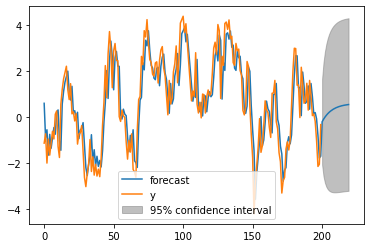

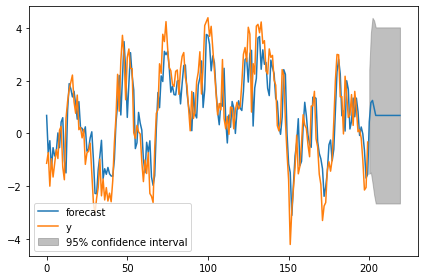

In [52]:
import matplotlib.pyplot as plt
mod_1.plot_predict(start=0, end=219)
mod_2.plot_predict(start=0, end=219)
plt.tight_layout()
plt.show()

### (f)  We  have  defined  the  function  to  use  one-step  rolling  cross  validation.   Read  it  verycarefully and define function(s) in python to evaluate ARMA performance by usingh=2, 3 and 4 steps rolling cross validation(you don’t have to follow how I did it), andreport the RSME of 1-step, 2-step, 3-step and 4-step forecasting for model 1 and model2:RMSE1-step2-step3-step4-stepModel 1Model 2

In [28]:
def evaluate_arma_model_steps(X, arma_order, step=1):
    train_size = int(len(X) * 0.67)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARMA(history, order=arma_order)
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=step)[0][step-1] #predict one step
        predictions.append(yhat) #store prediction
        history.append(test[t]) #store observation
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_rmse_models_steps(dataset, p_value, q_value, step=1):
    best_score, best_cfg = float("inf"), None
    order = (p_value, q_value)
    try:
        rmse = evaluate_arma_model_steps(dataset, order, step)
        if rmse < best_score:
            best_score, best_cfg = rmse, order
            print('ARMA%s, Step=%s, RMSE=%.3f' % (order, step, rmse))
    except:
        pass

### Model 1 

In [29]:
evaluate_rmse_models_steps(data.Profit.values, 1, 0, 1)
evaluate_rmse_models_steps(data.Profit.values, 1, 0, 2)
evaluate_rmse_models_steps(data.Profit.values, 1, 0, 3)
evaluate_rmse_models_steps(data.Profit.values, 1, 0, 4)

ARMA(1, 0), Step=1, RMSE=0.988
ARMA(1, 0), Step=2, RMSE=0.989
ARMA(1, 0), Step=3, RMSE=1.020
ARMA(1, 0), Step=4, RMSE=1.069


### Model 2

In [101]:
evaluate_rmse_models_steps(data.Profit.values, 0, 4, 1)
evaluate_rmse_models_steps(data.Profit.values, 0, 4, 2)
evaluate_rmse_models_steps(data.Profit.values, 0, 4, 3)
evaluate_rmse_models_steps(data.Profit.values, 0, 4, 4)

ARMA(0, 4), Step=1, RMSE=0.976
ARMA(0, 4), Step=2, RMSE=1.859
ARMA(0, 4), Step=3, RMSE=1.859
ARMA(0, 4), Step=4, RMSE=1.859


In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from math import sqrt
def evaluate_arima_model_steps(X, arima_order, steps):
    train_size = int(len(X) * 0.67)
    train, test = X[0:train_size], X[train_size:]
    rmse_list = []
    for step in steps:
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
    #         print(model_fit.forecast(steps=step))
            yhat = model_fit.forecast(steps=step)[step-1] #predict one step
            predictions.append(yhat) #store prediction
            history.append(test[t]) #store observation
        # calculate out of sample error
        rmse = sqrt(mean_squared_error(test, predictions))
        rmse_list.append(rmse)
    return rmse_list


In [17]:
evaluate_arima_model_steps(data.Profit.values, (0, 0, 4), [1, 2, 3, 4, 5])

[0.9759833156607409,
 1.1579016956903379,
 1.469283446199942,
 1.726006067267555,
 1.8590672511714068]